# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
---

#### Tal Daniel

## Tutorial 01 - Probability Refresher and Maximum Likelihood Estimator (MLE)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Probability Basics](#-Probability-Basics)
* [Bayes Rule](#-Bayes-Rule)
* [Expectation & Variance](#-Mean-&-Variance)
* [Correlation](#-Correlation)
* [Maximum Likelihood Estimator](#-Maximum-Likelihood-Estimation-(MLE))
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## <img src="https://img.icons8.com/office/80/000000/dice.png" style="height:50px;display:inline"> Probability Basics
---
We define the following:
* **Experiment** - an experiment or trial is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes, known as the sample space.
    * Example: toss a coin twice
* **Sample Space ($\Omega$)** - possible outcomes of an experiment
    * Example (coin toss): {HH, HT, TH, TT} (H = Heads, T = Tails)
* **Event** - a subset of possible outcomes
    * Example (coin toss): A = {HH} , B= {HT, TH}

* **Probability (of an event)** - a number assigned to an event
    * Example (coin toss): $Pr(A) = \frac{1}{4}$
* **Axioms**:
    1. $0 \leq Pr(A) \leq 1$
    2. $Pr(\Omega) = 1 $
    3. $Pr(A \cup B) = Pr(A) + Pr(B) - P(A \cap B)$ (if $A, B$ are independent $P(A \cap B) = 0$)

<img src="./assets/tut_01_intersection.jpg">
(image from <a href="http://tistats.com/probability-intersection-ti-84/">tistats.com</a>)

#### Summary


| Term | Usually donated by | Definition | Example  |
| --- | --- | --- | --- |
| **Experiment** | | <center>any procedure that can be infinitely repeated and has a well-defined set of possible outcomes </center>|<center> toss a coin twice </center> |
| **Sample** | $\omega$ |<center> A single outcome of an experiment </center>|<center>  A single outcome. for example: $H$ </center>|
| **Sample Space** | $\Omega$ | <center>The set of all possible outcomes </center>| <center> The set of all possible outcomes, for example: {HH, HT, TH, TT} </center>|
| **Event** | $A$ | <center>a subset of possible outcomes </center>| <center>A = {HH} , B= {HT, TH}  <br> An empty set  $\emptyset$ <br> The entire set (any outcome): $\Omega$ </center>|
| **Event Space** | $\mathcal{F}$ | <center>The space of all possible events </center>| <center> $\{HH\}, \{HT\}, \{TH\}, \{TT\}, \{\emptyset\}, \{\Omega\}$ </center> |
| **Probability** | P, Pr |<center> A function $P:\mathcal{F}\rightarrow\left[0,1\right]$ which assigns a probability to each event </center>| <center> $P(HT) = \frac{1}{4}$<br> $P(\emptyset)=0$<br>$P(\Omega)=1$ </center>|


In [2]:
possible_outcomes = ['H', 'T']
probabilities = [0.5, 0.5]
# toss a coin twice
first_toss = np.random.choice(possible_outcomes, p=probabilities)
print("first toss result: ", first_toss)
second_toss = np.random.choice(possible_outcomes, p=probabilities)
print("second toss result: ", second_toss)

first toss result:  H
second toss result:  T


### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:50px;display:inline"> Exercise 1 - Dice Probability
---
Find the proability of getting an even number **or** a number that is a multiple of 3.

### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:50px;display:inline"> Solution 1
---
* $S = \{1, 2, 3, 4, 5, 6\}$
* $ P(A=even) = \frac{3}{6} = 0.5$
* $ P(B=\textit{multiple of 3}) = \frac{2}{6} = \frac{1}{3}$
* $ P(A \cap B) = \frac{1}{6}$, since $ A \cap B = \{6\}$
* $\rightarrow P(A \cup B) = \frac{3}{6} + \frac{2}{6} - \frac{1}{6} = \frac{4}{6} = \frac{2}{3} $

Why is it different than just giving the probability of getting a 6? Because we ask about 2 different events (even number and a multiple of 3), and we ask for the union of 2 events.

## <img src="https://img.icons8.com/clouds/64/000000/handshake.png" style="height:50px;display:inline"> Joint Probability
---
* **Joint Probability - Pr(A,B)** - the probability the both event A and event B happen ($Pr(A,B) \geq 0$)
* **Marginal Distributions** -
    * $\sum_i Pr(A_i, B_j) = Pr(B_j)$
    * $\sum_j Pr(A_i, B_j) = Pr(A_i)$
* **Law of Total Probability** - suppose the events $B_1, B_2, ..., B_k$ are mutually exclusive (intersection of all events is zero) and form a partition of the sample space (i.e. one of them must occur), then for any event $Pr(A)$: $$Pr(A) = \sum_{j=1}^k Pr(A|B_j)P(B_j)$$

* **Conditioning** - if A and B are events and $Pr(B) > 0$, the **conditional probability of A given B** is: $Pr(A|B)$
    * $Pr(A|B) = \frac{P(A,B)}{P(B)}$
    * $\rightarrow Pr(A,B) = Pr(A|B)Pr(B)$
    * **the chain rule** - in the general case: $$Pr(\bigcap_i A_i) = \prod_{i=n}^1 Pr(A_i|A_{i-1}, ..., A_1)$$
        * $Pr(A,B,C) = P(A|B,C)P(B,C) = P(A|B,C)P(B|C)P(C)$
        * Is that the only option? No! $Pr(A,B,C) = P(C|A,B)P(A,B) = P(C|A,B)P(B|A)P(A)$

* **Independence** - 
    * Two events A and B are independent iff
        * $Pr(A|B) = Pr(A)$
        * $Pr(A,B) = Pr(A)Pr(B)$
    * For a set of events $\{A_i\}$, independence:
        * $Pr(\bigcap_i A_i) = \prod_i Pr(A_i)$

* **Conditional Independence** - Events A and B are conditionally independent given C:
    * $Pr(A,B|C) = Pr(A|C)Pr(B|C)$
    * $Pr(A|B,C) = Pr(A|C)$

## <img src="https://img.icons8.com/dusk/64/000000/variable.png" style="height:50px;display:inline"> Continuous Random Variables
---
Assume $X$ is a continuous random variable. We define the following:
* **Cumulative Distribution Function (CDF)** - $F(x) = P(X \leq x)$
    * The CDF is monotonically non-decreasing
    * $ P(a < X \leq b) = F(b) - F(a)$
    * $\lim_{a\to\infty} F_x(a) = 1$
    * $\lim_{a\to 0} F_x(a) = 0$

* **Probability Density Function (PDF)** - $f(x) = \frac{d}{dx}F(x)$
    * $P(a < X \leq b) = \int_a^b f(x)dx $
* All we have seen for **discrete** variables hold for **continuous** by replacing the sum with an integral
* Note that unlike the discrete case the PDF can be larger than one, i.e. $p(x) > 0$ but is not upper bounded. In order for the integral of the PDF to be smaller than 1, the PDF can be larger than one, but not for long intervals (recall that the CDF is just the area under the PDF).

In [3]:
def plot_normal_pdf_cdf(mu=0, sigma=1):
    x = np.linspace(-10, 10, 1000)
    x_pdf = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
    x_cdf = np.cumsum(x_pdf) / (len(x) / (np.max(x) - np.min(x))) # normalization
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, x_pdf, label='PDF')
    ax.plot(x, x_cdf, label='CDF')
    ax.grid()
    ax.legend()
    ax.set_xlabel('x')
    ax.set_title('PDF and CDF of Normal Distribution')

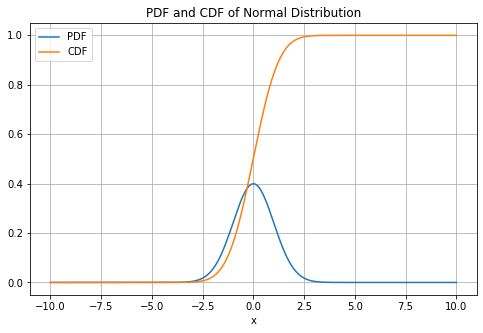

In [4]:
plot_normal_pdf_cdf(mu=0, sigma=1)

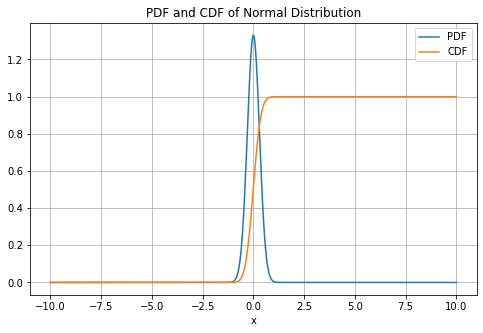

In [5]:
plot_normal_pdf_cdf(mu=0, sigma=0.3)
# notice how the pdf can be larger than 1 

## <img src="https://img.icons8.com/dusk/64/000000/b.png" style="height:50px;display:inline"> Bayes Rule
---
Suppose that the events $B_1, ..., B_k$ are mutually exclusive and form a partiotion of the sample space (i.e. one of them must occur), then for any event $Pr(A)$, **Bayes Rule**:
$$Pr(B_i|A) = \frac{Pr(A,B_i)}{Pr(A)} = \frac{Pr(A|B_i)Pr(B_i)}{Pr(A)} = \frac{Pr(A|B_i)Pr(B_i)}{\sum_{j=1}^k Pr(A|B_j)Pr(B_j)}$$

#### <img src="https://img.icons8.com/dusk/64/000000/high-priority.png" style="height:50px;display:inline"> REMEMBER THESE!
* **Posterior Distribution** - $Pr(B_i|A)$
* **Liklihood Distribution** - $Pr(A|B_i)$
* **Prior Distribution** - $Pr(B_i)$
* **Evidence** - $Pr(A)$

<img src="./assets/tut_01_bayes_rule.png" style="height:250px">

* <a href="https://www.norwegiancreations.com/2018/10/bayes-rule-and-the-monty-hall-problem/">Image Source</a>

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example 
---
Given a dataset where each sample is a male or a female with their height, what is the probability that given a certain height, that person is a female, that is, calculate: $Pr(\textit{Gender} = \textit{Female} | \textit{Height} = X cm)$?

In [6]:
# load the data
dataset = pd.read_csv('./datasets/heights_dataset.csv')
# use only the heights
dataset = dataset.drop('Weight', axis=1)
# inch -> cm
dataset['Height'] = dataset['Height'] * 2.54
## print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: {}'.format(number_of_rows))
## show the first 10 rows
dataset.head(10)

Number of rows in the dataset: 10000


,Gender,Height
0,Male,187.571423
1,Male,174.706036
2,Male,188.239668
3,Male,182.196685
4,Male,177.499761
5,Male,170.822660
6,Male,174.714106
7,Male,173.605229
8,Male,170.228132
9,Male,161.179495


### <img src="https://img.icons8.com/dusk/64/000000/maximum-value.png" style="height:50px;display:inline"> Histogram
---
* A histogram is an accurate representation of the distribution of numerical data. 
* It is an estimate of the probability distribution (PDF) of a continuous variable. 
* To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. 
    * The bins are usually specified as consecutive, non-overlapping intervals of a variable. 
    * The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

Text(0.5, 0, 'Height(cm)')

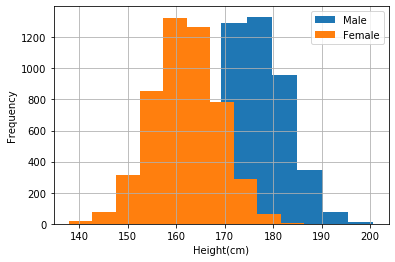

In [7]:
# let's plot the histogram
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
male_ds = dataset[:5000].rename(index=str, columns={"Height": "Male"}).plot.hist(ax=ax)
female_ds = dataset[5000:].rename(index=str, columns={"Height": "Female"}).plot.hist(ax=ax)
ax.grid()
ax.set_xlabel('Height(cm)')

* Assume that the height is a *discrete* variable (we use quantization on the dataset, only integers).
* $Pr(Male) = Pr(Female) = 0.5$
* $Pr(170cm|Female) \approx \frac{800}{5000} = 0.16$ (in the presentation $0.1$)
* $Pr(170cm|Male) \approx \frac{1300}{5000} = 0.26$ (in the presentation $0.3$)
* Using **Bayes rule**: $$ Pr(Female|170cm) = \frac{Pr(170cm|Female)Pr(Female)}{Pr(170cm)} = \frac{Pr(170cm|Female)Pr(Female)}{Pr(170cm|Male)Pr(Male) + Pr(170cm|Female)Pr(Female)} = \frac{0.16 * 0.5}{0.16 * 0.5 + 0.26 * 0.5} = 0.38$$ ($0.25$ in the presentation)

## <img src="https://img.icons8.com/dusk/64/000000/statistics.png" style="height:50px;display:inline"> Mean & Variance
---
### Mean (Expectation) - $\mu$
---
The mean is the proability weighted average of all possible values.
* Discrete Variables:
    * $\mathbb{E}[X] = \sum_{x \in X} xp(x)$
    * $\mathbb{E}[f(X)] = \sum_{x \in X} f(x)p(x)$
* Continuous Variables:
    * $\mathbb{E}[X] = \int_x xp(x)$
    * $\mathbb{E}[f(X)] = \int_{x \in X} f(x)p(x)$
* Example: the mean of a fair six-sided dice: $$\mathbb{E}[X] = 1*\frac{1}{6} + 2*\frac{1}{6} + 3*\frac{1}{6} + 4*\frac{1}{6} + 5*\frac{1}{6} + 6*\frac{1}{6} = 3.5$$

* **The Law of Total Expectation (Smoothing Theorem)**: $$\mathbb{E}[X] = \mathbb{E}\big[\mathbb{E}[X|Y] \big] $$
    * Proof: $$\mathbb{E}\big[\mathbb{E}[X|Y] \big] = \mathbb{E}\big[ \sum_x x \cdot P(X=x|Y) \big] = \sum_y \big[ \sum_x x \cdot P(X=x|Y) \big] \cdot P(Y=y)$$ $$ = \sum_y \big[ \sum_x x \cdot P(X=x|Y) \cdot P(Y=y)\big] = \sum_y \big[ \sum_x x \cdot P(X=x, Y=y)\big] $$ $$ = \sum_x x\cdot \big[ \sum_y \cdot P(X=x, Y=y)\big] = \sum_x x\cdot \big[P(X=x)\big] = \mathbb{E}[X]$$
    * Example: Suppose that two factories supply light bulbs to the market. Factory X's bulbs work for an average of 5000 hours, whereas factory Y's bulbs work for an average of 4000 hours. It is known that factory X supplies 60% of the total bulbs available. What is the expected length of time that a purchased bulb will work for? $$\mathbb{E}[L] = \mathbb{E}\big[\mathbb{E}[L|factory] \big] = \mathbb{E}[L|X] \cdot P(X) + \mathbb{E}[L|Y] \cdot P(Y) = 5000 \cdot 0.6 + 4000 \cdot 0.4 = 4600$$

### Variance - $\sigma^2$
---
The variance is a measure of the "spread" of the distribution (can also be considered as confidence).

* $var[X] = \mathbb{E}[(X - \mu)^2] = \sum (x-\mu)^2 p(x) = \sum x^2 p(x) + \mu^2 \sum p(x) -2 \mu \sum x p(x) =  \mathbb{E}[X^2] - \mu^2$
* **The Standard Deviation** - $std[X] = \sqrt{var[X]}$
* Example: the variance of a fair six-sided dice: $$var[X] = \sum_{i=1}^6 \frac{1}{6} (i-3.5)^2$$ $$ E[X^2] = 1^2 *\frac{1}{6} + 2^2 *\frac{1}{6} + 3^2 *\frac{1}{6} + 4^2*\frac{1}{6} + 5^2*\frac{1}{6} + 6^2*\frac{1}{6} = \frac{91}{6} $$ $$ var[X] = E[X^2] -\mu ^2 = \frac{91}{6} - 3.5^2 \approx 2.92 $$

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example cont.
---
What is the mean and variance of the heights of males? females? combined together?

In [8]:
# easy with pandas
print("the mean of males' height is: {:.3f} cm".format(dataset[:5000].Height.mean()))
print("the variance of males' height is: {:.3f} cm^2".format(dataset[:5000].Height.var()))
print("the std of males' height is: {:.3f} cm".format(dataset[:5000].Height.std()))

the mean of males' height is: 175.327 cm
the variance of males' height is: 52.896 cm^2
the std of males' height is: 7.273 cm


In [9]:
print("the mean of females' height is: {:.3f} cm".format(dataset[5000:].Height.mean()))
print("the variance of females' height is: {:.3f} cm^2".format(dataset[5000:].Height.var()))
print("the std of females' height is: {:.3f} cm".format(dataset[5000:].Height.std()))

the mean of females' height is: 161.820 cm
the variance of females' height is: 46.903 cm^2
the std of females' height is: 6.849 cm


In [10]:
print("the mean of total height is: {:.3f} cm".format(dataset.Height.mean()))
print("the variance of total height is: {:.3f} cm^2".format(dataset.Height.var()))
print("the std of total' height is: {:.3f} cm".format(dataset.Height.std()))

the mean of total height is: 168.574 cm
the variance of total height is: 95.506 cm^2
the std of total' height is: 9.773 cm


## <img src="https://img.icons8.com/dusk/64/000000/positive-dynamic.png" style="height:50px;display:inline"> Correlation
---
Correlation is a measure of linear dependency between two variables.

We define **correlation** between two Random Variables (RV) as $\sigma_{xy}$:
* $\sigma_{xy} = Cov(X,Y) = \mathbb{E}[(X - \mu_x)(Y - \mu_y)] = \mathbb{E}[XY] - \mu_x \mu_y$
* $X, Y$ are **uncorrelated** if $\sigma_{xy} = 0 \leftrightarrow \mu_{xy} = \mu_x \mu_y$

<img src="https://img.icons8.com/dusk/64/000000/high-priority.png" style="height:20px;display:inline"> **REMEMBER**: 

Independence $\rightarrow$ Uncorrelated **BUT** Uncorrelated $\nrightarrow$ Independence

### Pearson's Correlation Coefficient (Pearson's r)
---
It is a measure of linear correlation between two variables X and Y, denoted $\rho$ or $r_{xy}$:
* $\rho = r_{xy} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$
* From **Cauchy-Schwarz** inequality: $$-1 \leq \rho \leq 1$$
    * $\rho = 0$ - no correlation
    * $\rho = 1$ - positive linear correlation
    * $\rho = -1$ - negative linear correlation
    * Reminder: Cauchy-Schwarz inequality:$|\langle x,y \rangle|^2 \leq \langle x,x \rangle \cdot \langle y,y \rangle$, equality iff $x,y$ are linealy dependent.
        * $\mathbb{E}(X,Y) = \langle X, Y \rangle \rightarrow |\mathbb{E}(X,Y)|^2 \leq \mathbb{E}(X^2) \mathbb{E}(Y^2) $
        * $$|Cov(X,Y)|^2 = |\mathbb{E}[(X-\mu_x) (Y-\mu_y)]|^2  = |\langle X-\mu_x,  Y-\mu_y \rangle|^2 \leq \langle X-\mu_x,  X-\mu_x \rangle \cdot \langle Y-\mu_y,  Y-\mu_y \rangle$$ $$ = \mathbb{E}[(X - \mu_x)^2] \mathbb{E}[(Y - \mu_y)^2] = Var(X) Var(Y) $$

Illustration:
<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" style="height:300px">
By <a href="//commons.wikimedia.org/wiki/User:Kiatdd" title="User:Kiatdd">Kiatdd</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=37108966">Link</a>

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example 
---
* Let $X \in \{-1,0,1\} \sim U(\frac{1}{3})$, $Y=X^2$
* $X,Y$ are clearly dependent **BUT**:
    * $\mu_x = 0$, $\mu_y = \frac{2}{3}$
    * $\mu_{xy} = \mathbb{E}[X^3] = 0$
    * $Cov(X,Y) = \mu_{xy} - \mu_x \mu_y = 0 - 0 * \frac{2}{3} = 0$

### Correlation DOES NOT Imply Causation
Below are examples (from the presentation) that show correlated variables, but they are not neccessariy caused by one another:

<img src="./assets/tut_01_cor_1.JPG" style="height:300px">

<img src="./assets/tut_01_cor_2.JPG" style="height:300px">

### Outliers
---
* In statistics, an outlier is an observation point that is distant from other observations. 
* An outlier may be due to variability in the measurement or it may indicate experimental error. The latter are sometimes excluded from the data set. 
* An outlier can cause serious problems in statistical analyses.

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example
---
If one is calculating the average temperature of 10 objects in a room, and nine of them are between 20 and 25 degrees Celsius, but an oven is at 175 °C, the median of the data will be between 20 and 25 °C but the mean temperature will be between 35.5 and 40 °C. In this case, the median better reflects the temperature of a randomly sampled object (but not the temperature in the room) than the mean. Naively interpreting the mean as "a typical sample", equivalent to the median, is incorrect. As illustrated in this case, outliers may indicate data points that belong to a different population than the rest of the sample set.

### Correlation - Sensitive to Ouliers
All the examples (from the presentation) below share the same Pearson's r:
<img src="./assets/tut_01_cor_3.JPG" style="height:400px">

## <img src="https://img.icons8.com/ultraviolet/80/000000/heat-map.png" style="height:50px;display:inline"> Vectors of Random Variables
---
* Let $\overline{X}$ be a d-dimensional **random** vector
    * $\overline{X} = [x_1, x_2, ..., x_d]$
* The d-dimensional **mean vector $\overline{\mu}$** is:
    * $\overline{\mu} = \mathbb{E}[\overline{X}] = [\mathbb{E}[x_1], \mathbb{E}[x_2], ..., \mathbb{E}[x_d]] = [\mu_1, \mu_2, ..., \mu_d]$

* The **covariance matrix $\Sigma$** is defined as the (**square**) matrix, where each component $\sigma_{ij}$ is the covariance of $x_i, x_j$:
    * $\sigma_{ij} = \mathbb{E}[(x_i - \mu_i)(x_j - \mu_j)]$
    * $$\Sigma = 
 \begin{pmatrix}
  \sigma_1 ^2 & \sigma_{1,2} & \cdots & \sigma_{1,d} \\
  \sigma_{2,1} & \sigma_2^2 & \cdots & \sigma_{2,d} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{d,1} & \sigma_{d,2} & \cdots & \sigma_d^2 
 \end{pmatrix}$$
 

## <img src="https://img.icons8.com/office/80/000000/normal-distribution-histogram.png" style="height:50px;display:inline"> Multivariate Normal Distribution
---
* $ x \sim N_d (\mu, \Sigma)$
* $$f(x) = \frac{1}{(2\pi)^{\frac{d}{2}} |\Sigma|^{\frac{1}{2}}} e^{- \frac{1}{2}(x - \mu)^{T} \Sigma^{-1} (x - \mu)}$$

In [11]:
num_samples = 1000
num_variables = 5
mu = np.random.random(size=(1, num_variables))
sigma = mu * mu.T + np.eye(num_variables) * 1e-4
# generate multivariate distribution
mult_var = np.random.multivariate_normal(np.zeros(num_variables), sigma)
print("mu:")
print(np.zeros(num_variables))
print("Sigma:")
print(sigma)
print("draw a sample from each variable:")
print(mult_var)

mu:
[0. 0. 0. 0. 0.]
Sigma:
[[0.04800934 0.0189633  0.13069076 0.03377338 0.08095299]
 [0.0189633  0.00760599 0.05172954 0.01336806 0.03204252]
 [0.13069076 0.05172954 0.35660823 0.0921296  0.22082975]
 [0.03377338 0.01336806 0.0921296  0.02390833 0.05706729]
 [0.08095299 0.03204252 0.22082975 0.05706729 0.13688724]]
draw a sample from each variable:
[-0.24298271 -0.09838847 -0.72393916 -0.176606   -0.41587365]


### <img src="https://img.icons8.com/cotton/64/000000/ruler.png" style="height:50px;display:inline"> Mahalanobis Distance
---
* $d = (x - \mu)^{T} \Sigma^{-1} (x - \mu)$
* Measures the distance from $x$ to $\mu$ in terms of $\Sigma$, that is, the distance between a point $p$ and a distribution $D$.
    * If $p$ is the mean of $D$, the distance is 0.
    * The distance grows as $p$ moves away from the mean along each principal component axis.
    * Note: if $\Sigma = I$ , that is the **Euclidean** distance.
* It normalizes the expression for difference in variances and correlations.

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - Bivariate
---
* $d=2$
* $\Sigma = 
 \begin{pmatrix}
  \sigma_1 ^2 & \rho \sigma_1 \sigma_2 \\
  \rho \sigma_1 \sigma_2 & \sigma_2^2
 \end{pmatrix}$
* $\rho$ is the Pearson coefficient

* Reminder: 2x2 matrix inversion $$ \begin{pmatrix}
  a & b \\
  c & d
 \end{pmatrix}^{-1} = \frac{1}{ad-bc} \begin{pmatrix}
  d & -b \\
  -c & a
 \end{pmatrix} $$
<br>
* $$\Sigma^{-1} = \frac{1}{\sigma_1^2 \sigma_2^2 (1 - \rho^2)} \begin{pmatrix} \sigma_2 ^2 & - \rho \sigma_1 \sigma_2 \\ - \rho \sigma_1 \sigma_2 & \sigma_1^2 \end{pmatrix}$$
 <br>
* $$f(x_1, x_2) = \frac{1}{2\pi \sigma_1 \sigma_2 \sqrt{1 - \rho^2}} e^{- \frac{1}{2(1-\rho^2)}(z_1^2 -2\rho z_1 z_2 + z_2^2)}$$
    * $z_i = \frac{x_i - \mu_i}{\sigma_i}$ (also called **standardization**)

In [12]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

def plot_3d_normal_dist():
    # Our 2-dimensional distribution will be over variables X and Y
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)

    # Mean vector and covariance matrix
    mu = np.array([0., 1.])
    Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    F = multivariate_normal(mu, Sigma)
    Z = F.pdf(pos)

    # Create a surface plot and projected filled contour plot under it.
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.viridis)

    # cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    ax.view_init(27, -21)

    plt.show()

<IPython.core.display.Javascript object>


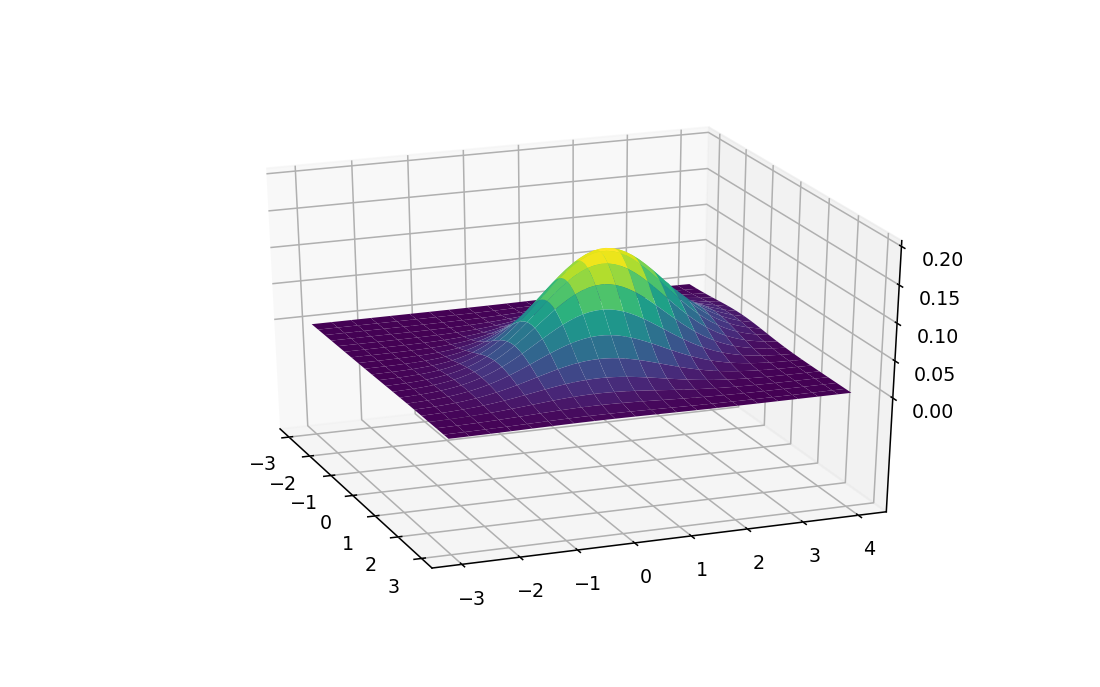

In [13]:
%matplotlib notebook
plot_3d_normal_dist()

## <img src="https://img.icons8.com/color/48/000000/transformer.png" style="height:50px;display:inline"> Linear Transformation of Normal Distribution
---
* **Linear** transformations of **normally distributed** random variables are **still normally distributed**
* Let $A \in \mathcal{R}^{d x k}$ and $y = A^{T}x$ then $$x \sim N_d(\mu, \Sigma) \rightarrow y \sim N_d(A^{T} \mu, A^{T} \Sigma A)$$
<img src="./assets/tut_01_transformation.JPG" style="height:300px">

## <img src="https://img.icons8.com/dusk/64/000000/question-shield.png" style="height:50px;display:inline"> Parameter Estimation
---
* **Goal** : Estimate the parameters, usually denoted by $\Theta$, of a parametric probability from its samples.
    * Given samples, how can we estimate the distribution these samples came from?
    * The problem in different words: let's say we model a distribution with parameters (i.e. $f(x;\theta) = f_{\theta}(x)$), that is, the probability function takes in input $x$, and using math operations with $x$ and $\theta$, gives us the probability of $x$. We want to find the parameters that best describe the data we were given.
* We denote:
    * $X$ - a parametric unknown variable
    * $D = \{x_k\}_{k=1}^n$ - samples of $X$ (the **data**)
* This is sometimes called Kernel Density Estimation (KDE)- A kernel density estimation (KDE) is a way to estimate the probability density function (PDF) of the random variable that “underlies” our sample. KDE is a means of data smoothing.

#### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example
---
Given 5,000 samples of heights for each gender, estimate the Gaussian of heights for each gender.

We want to achieve something like that:
<img src="./assets/tut_01_param_est.PNG" style="height:250px">

* <a href="https://realpython.com/python-histograms/">Image Source</a>

## <img src="https://img.icons8.com/dusk/64/000000/maximum-value.png" style="height:50px;display:inline"> Maximum Likelihood Estimation (MLE)
---
* The MLE is an estimator that picks the best parameters by maximizing the **likelihood** of the distribution. Recall that when we developed Bayes rule, the likelihood is $p(D|\theta)$ (which is a function of $\theta$).
* Definition: $$\hat{\theta}_{MLE} = \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} p(D|\theta) =  \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} \log p(D|\theta)$$
    * The last equality is true since the log function is monotonically increasing. Therefore if a function $f(x) \geq 0$, achieves a maximum at $x_1$, then $\log⁡(f(x))$ also achieves a maximum at $x_1$

* We assume the variables are **I.I.D (independent identically distributed)**. Note that these are the samples.
* $L(\theta) = p(D|\theta) = p(x_1, x_2, ..., x_n|\theta) = \prod_{k=1}^n p(x_k|\theta)$
* $l(\theta) = \log \big(L(\theta)\big) = \sum_{k=1}^{n} \log p(x_k|\theta)$
    * $\log(x * y * z) = \log x + \log y + \log z$
* $\rightarrow \hat{\theta}_{MLE} =  \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} \{ l(\theta)\}$

### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:50px;display:inline"> Exercise 2 - MLE for Univariate Gaussian
---
Given $\{x_i\}_{i=1}^n$ i.i.d samples of $X \sim N(\mu, \sigma^2)$, what is the MLE?

### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:50px;display:inline"> Solution 2
---
The first thing to ask yourself is, **what are the parameters** in this problem? In our case, the parametrs are $\theta = [\mu, \sigma^2]$, it is just a matter of notation.

* $p(x_i) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{- \frac{1}{2} \frac{(x_i - \mu)^2}{\sigma^2}}$
* $L(\theta) = L(\mu, \sigma^2) = p(x_1, x_2, ..., x_n |\mu, \sigma^2) = \prod_{i=1}^n p(x_i|\theta) = \frac{1}{(2\pi \sigma^2)^{\frac{n}{2}}} e^{\frac{-1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2}$
* $l(\theta) = \log L(\theta) = -n (\log \pi + \frac{1}{2} \log \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2$

#### Find the optimal $\theta$
As usual, find the point where the deriviative w.r.t $\theta$ is 0
* $\frac{\partial l}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu) = 0 \rightarrow \hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i$
* $\frac{\partial l}{\partial \sigma^2} = - \frac{n}{2 \sigma^2} + \frac{1}{\sigma^4}\sum_{i=1}^n (x_i - \mu)^2 = 0 $
    * Plug in $\mu = \hat{\mu}_{MLE} \rightarrow \hat{\sigma^2}_{MLE} = \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu}_{MLE})^2 $

* Summary: $$ \hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i$$ $$\hat{\sigma^2}_{MLE} = \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu}_{MLE})^2 $$

* Do these look familiar? These are the **empirical** mean and variance!

In [14]:
def plot_normal_mle():
    mu_real = 5
    var_real = 36
    num_samples= 1000
    samples = np.random.normal(mu_real, np.sqrt(var_real), size=(num_samples))

    mu_mle = np.sum(samples) / num_samples
    var_mle = np.sum(np.square(samples - mu_mle)) / num_samples

    x = np.linspace(-30, 30, 10000)
    f_x_mle = (1 / np.sqrt(2 * np.pi * var_mle)) * np.exp(-0.5 * (np.square(x - mu_mle)) / var_mle)

    # set bins for histogram
    n_bins = 100
    bins_edges = np.linspace(samples.min(), samples.max() + 1e-9, n_bins + 1)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.grid()
    ax.set_ylabel('Histogram (PDF)')
    ax.set_xlabel('x')

    # plot histogram
    ax.hist(samples, bins=bins_edges, density=True, label="Samples")
    # plot estimation
    ax.plot(x, f_x_mle, linewidth=3, color='red', label="MLE")
    ax.legend()

<IPython.core.display.Javascript object>


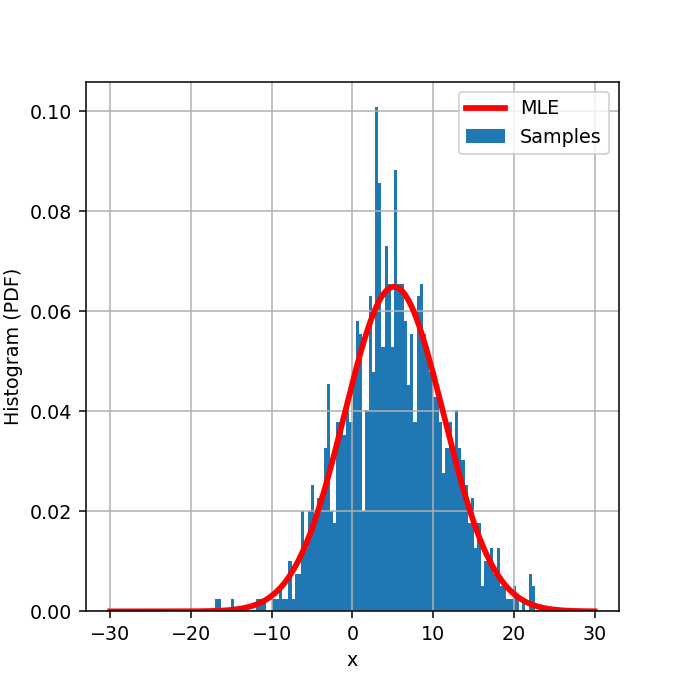

In [15]:
# let's see how the MLE performs
plot_normal_mle()

### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:50px;display:inline"> Exercise 2.5 - MLE for m-Dimensional Gaussian
---
Given $\{x_i\}_{i=1}^n$ i.i.d samples of $X \sim N(\mu, \Sigma)$, what is the MLE?

### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:50px;display:inline"> Solution 2.5
---
The final results are pretty much the same, but with vectors and matrices, though the math is a little more complicated.
$$ \hat{\overline{\mu}}_{MLE} = \frac{1}{n} \sum_{i=1}^n \overline{x_i} $$
$$ \hat{\Sigma}_{MLE} = \frac{1}{n} \sum_{i=1}^n (\overline{x_i} - \hat{\overline{\mu}}_{MLE}) (\overline{x_i} - \hat{\overline{\mu}}_{MLE})^{T}$$

#### <img src="https://img.icons8.com/dusk/64/000000/scissors.png" style="height:30px;display:inline"> Vector & Matrix Deriviatives
---
* $\nabla_x Ax = A^{T}$
* $\nabla_x x^{T} A x = (A + A^{T}) x$ 
* $\frac{\partial}{\partial A} \ln |A| = A^{-T}$
* $\frac{\partial}{\partial A} Tr[AB] = B^{T}$

Using the above, we will use the following:
1. $\nabla_{\mu} {\mu}^{T} \Sigma^{-1} x_i = \Sigma^{-1} x_i$ 
2. $\nabla_{\mu} {\mu}^{T} \Sigma^{-1} \mu = (\Sigma^{-1} + {\Sigma}^{-T}) \mu$
3. $\frac{\partial}{\partial \Sigma^{-1}} \ln |\Sigma^{-1}| = \Sigma^{T} = \Sigma$
4. $\frac{\partial}{\partial \Sigma^{-1}} Tr[\Sigma^{-1} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T}] = \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T}$

#### Solve for the d-dimensional case
* $p(x|\mu, \Sigma) = \frac{1}{(2\pi)^{\frac{nd}{2}} |\Sigma|^{\frac{n}{2}}} e^{- \frac{1}{2}\sum_{i=1}^n (x_i - \mu)^{T} \Sigma^{-1} (x_i - \mu)}$

<br>

* $\ln p(x|\mu, \Sigma) \propto -\frac{n}{2} \ln |\Sigma^{-1}| -\frac{1}{2} \sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) $

<br>

* $\nabla_{\mu} \sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) = \sum_{i=1}^{n} (-2\Sigma^{-1} x_i + (\Sigma^{-1} + {\Sigma}^{-T}) \mu) = 0 \rightarrow \hat{\overline{\mu}}_{MLE} = \frac{1}{n} \sum_{i=1}^n \overline{x_i} $


* **The Trace Trick** - $\sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) = \sum_{i=1}^n \textit{Trace}\big((\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu})\big) = \textit{Trace}\big(\Sigma^{-1} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T} \big)$

<br>

* $\frac{\partial}{\partial \Sigma^{-1}}\big( \frac{n}{2} \ln |\Sigma^{-1}| -\frac{1}{2} \sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) \big) = \frac{\partial}{\partial \Sigma^{-1}}\big( \frac{n}{2} \ln |\Sigma^{-1}| -\frac{1}{2} \Sigma^{-1} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T} \big) = $ $$ \frac{n}{2} \Sigma - \frac{1}{2} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T} = 0 \rightarrow \hat{\Sigma}_{MLE} = \frac{1}{n} \sum_{i=1}^n (\overline{x_i} - \hat{\overline{\mu}}_{MLE}) (\overline{x_i} - \hat{\overline{\mu}}_{MLE})^{T} $$

### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:50px;display:inline"> Exercise 3 - MLE for Geometric Distribution
---
Given $\{x_i\}_{i=1}^n$ i.i.d samples of $X \sim \textit{Geom}(\theta)$, what is the MLE?

Assume:
* $f(x;\theta) = Pr(X=x) = \theta(1-\theta)^{x-1}$
* $ 0 < \theta < 1$
* $\mathbb{E}(X) = \frac{1}{\theta}$
* $Var(X) = \frac{1 - \theta}{\theta^2}$

### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:50px;display:inline"> Solution 3
---
* $L(x_1, x_2, ..., x_n; \theta) = \prod_{i=1}^n f(x_i;\theta) = \theta^n (1 -\theta)^{\sum_{i=1}^n (x_i - 1)}$
* $l(\theta) = \ln L(x_1, x_2, ..., x_n; \theta) = \sum_{i=1}^n \ln f(x_i;\theta) = n\ln(\theta) +\ln (1-\theta) \sum_{i=1}^n (x_i - 1) $
* $\theta_{MLE} = \underset{0 < \theta < 1}{\mathrm{argmax}} l(\theta)$
* First derivative: $$\frac{\partial l(\theta)}{\partial \theta}  = \frac{n}{\theta} - \frac{1}{1 - \theta} \sum_{i=1}^n (x_i - 1)$$

* Second derivative: $$\frac{\partial^2 l(\theta)}{\partial \theta^2}  = -\frac{n}{\theta^2} - (\frac{1}{1 - \theta})^2 \sum_{i=1}^n (x_i - 1)$$
* $$ \frac{n}{\theta} - \frac{1}{1 - \theta} \sum_{i=1}^n (x_i - 1) = 0 \rightarrow \theta_{MLE} = \frac{1}{n}\sum_{i=1}^n x_i$$

* Plug in $\theta_{MLE}$ in the second deriviative and keep in mind that $0 < \theta_{MLE} < 1$:
    * $\sum_{i=1}^n (x_i - 1) = n(\frac{1}{\theta_{MLE}} - 1) = n \frac{1 - \theta_{MLE}}{\theta_{MLE}}$
    * $$ -\frac{n}{\theta_{MLE}^2} - (\frac{1}{1 - \theta_{MLE}})^2 \sum_{i=1}^n (x_i - 1) = -\frac{n}{\theta_{MLE}^2} - (\frac{1}{1 - \theta_{MLE}})^2 n \frac{1 - \theta_{MLE}}{\theta_{MLE}} = ... = - \frac{n}{\theta_{MLE}^2(1-\theta_{MLE})} < 0$$
    * Since $0 < \theta_{MLE} < 1$, we have a maximum.

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject
* Basic Probability - <a href="https://www.youtube.com/watch?v=KzfWUEJjG18">Math Antics - Basic Probability</a>
* Probability for ML - <a href="https://www.youtube.com/watch?v=wG_gQpXJNGU">Machine Learning 1/5: Probability</a>
* Maximum Likelihood Estimation (MLE)
    * Simple Version (6 min) - <a href="https://www.youtube.com/watch?v=XepXtl9YKwc">StatQuest</a>
    * Complete Lecture (50 min) - <a href="https://www.youtube.com/watch?v=RIawrYLVdIw&t=2263s">Cornell CS4780</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/